In [147]:
from qiskit.quantum_info import random_density_matrix, Operator, Statevector, DensityMatrix, random_unitary, random_statevector, random_clifford, Pauli, SparsePauliOp
from qiskit.circuit import Parameter, ParameterVector, QuantumCircuit
from qiskit.circuit.library import RXGate, RYGate, RZGate, HGate
from qiskit.visualization import *
from qiskit.quantum_info import process_fidelity

import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import minimize
from math import pi, cos, sin, sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from itertools import product

In [148]:
T = random_unitary(2)
U = None  # Initialize U
num_of_samples = 200

In [149]:
# Define the objective function to maximize
def objective_function(theta_values):
    global U  # Use the global U variable
    theta_1, theta_2, theta_3 = theta_values

    # Define the H and D states as needed
    psi_1 = Statevector.from_label("0")
    psi_2 = Statevector.from_label("+")

    # Calculate the U gate
    qc_1 = QuantumCircuit(1)
    qc_1.rz(theta_1, 0)
    qc_1.rx(theta_2, 0)
    qc_1.rz(theta_3, 0)
    U = Operator(qc_1)

    qc_2 = QuantumCircuit(1)
    qc_2.rz(theta_1, 0)
    qc_2.rx(theta_2, 0)
    qc_2.rz(theta_3, 0)
    qc_2.h(0)
    U_other = Operator(qc_2)

    # Calculate the probabilities
    psi_a = psi_1.evolve(T).evolve(U)
    psi_b = psi_2.evolve(T).evolve(U_other)

    #Count probs
    count_a_0 = 0
    count_a_1 = 0
    count_b_0 = 0
    count_b_1 = 0

    for _ in range(num_of_samples):
        m_1, _ = psi_a.measure()
        m_2, _ = psi_b.measure()

        if(m_1 == "0"):
            count_a_0 += 1
        else:
            count_a_1 += 1
        
        if(m_2 == "0"):
            count_b_0 += 1
        else:
            count_b_1 += 1

    prob_a = count_a_0 / (count_a_0 + count_a_1)
    prob_b = count_b_0 / (count_b_0 + count_b_1)

    # Calculate the product of probabilities to maximize
    return -(prob_a * prob_b)

In [150]:
# Define a custom callback function to print intermediate results
def callback(xk):
    print(f"Optimization Step: {len(callback.steps)}")
    print(f"Theta Values: {xk}")
    max_prob = -objective_function(xk)
    print(f"Maximum Probability: {max_prob}\n")
    callback.steps.append(max_prob)

callback.steps = []

In [151]:
# Initial guess for theta values
initial_theta_values = [0.0, 0.0, 0.0]

# Perform the optimization with the custom callback
result = minimize(objective_function, initial_theta_values, method='Powell', options={'disp': True, 'maxiter': 10}, callback=callback)

# Extract the optimal theta values and the maximum probability
optimal_theta_values = result.x
max_probability = -result.fun

# Print the final optimal theta values and maximum probability
print("\nOptimal Theta Values:", optimal_theta_values)
print("Maximum Probability:", max_probability)

Optimization Step: 0
Theta Values: [ 2.618034    1.70892639 -1.17584433]
Maximum Probability: 0.975

Optimization Step: 1
Theta Values: [ 2.61760828  1.74842757 -1.11353843]
Maximum Probability: 0.970125

Optimization Step: 2
Theta Values: [ 2.70819749  1.93814135 -0.85842779]
Maximum Probability: 0.990025

Optimization Step: 3
Theta Values: [ 2.63529568  1.94532667 -0.93417836]
Maximum Probability: 1.0

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 4
         Function evaluations: 198

Optimal Theta Values: [ 2.63529568  1.94532667 -0.93417836]
Maximum Probability: 1.0


In [152]:
process_fidelity(T @ U, Operator(np.eye(2)))

0.9996870000838184

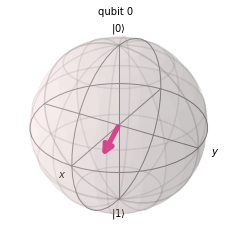

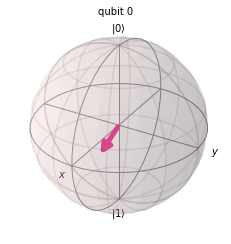

In [153]:
psi_test = random_statevector(2)
display(plot_bloch_multivector(psi_test))
display(plot_bloch_multivector(psi_test.evolve(T).evolve(U)))